In [1]:
from pathlib import Path
import json

In [2]:
asr_data = json.load(Path("D:/LangOn/reform/asr/劉櫂豪-127903.gasr.json").open(encoding="UTF-8"))
metadata = json.load(Path("../../data/metadata.json").open(encoding="UTF-8"))

In [3]:
asr = asr_data["response"]["results"]
transcript = [x for x in metadata if x["video_id"]=="127903"][0]["transcript"]

In [4]:
# ans = open("../../data/李昆澤-127844.turn.ans.txt").read().split(",")

## ASR

In [5]:
from itertools import chain

def to_num(x):
    return float(x.replace("s", ""))

def flatten_asr(asr_obj):    
    asr_starts = []
    asr_ends = []
    asr_words = []
    for entry_x in asr_obj:
        alts = entry_x.get("alternatives", [])
        if not alts: continue
        words = alts[0].get("words", [])        
        asr_starts.extend([
            to_num(x["startTime"]) for x in words])
        asr_ends.extend([
            to_num(x["endTime"]) for x in words])
        asr_words.extend([x["word"] for x in words])
        
    return {
        "starts": asr_starts,
        "ends": asr_ends,
        "words": asr_words
    }

flat_asr = flatten_asr(asr)
assert len(flat_asr["starts"]) == len(flat_asr["words"])

## 找時間長的字

In [6]:
ch_lengths = [e-s for s, e in zip(flat_asr["starts"], flat_asr["ends"])]
ch_ends = flat_asr["ends"]

In [8]:
# ans_secs = [(datetime.strptime(t, "%H:%M:%S")-datetime(1900,1,1)).seconds for t in ans]
# ans_secs[:3]

(0.0, 2.0)

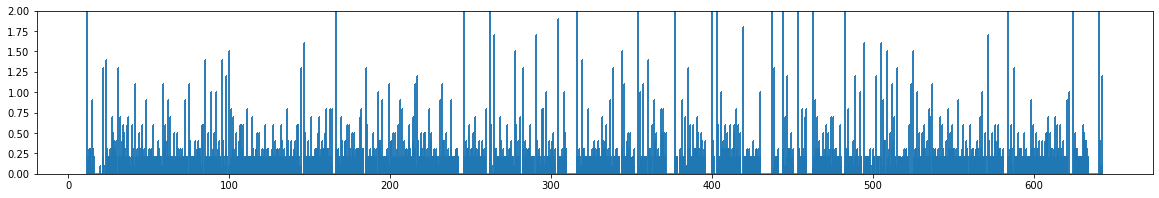

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,3))
plt.stem(ch_ends, ch_lengths, markerfmt=',')
plt.gca().set_ylim(0,2)
# for t in ans_secs:
    # plt.axvline(t, color="red", linestyle='dashed')
    

In [26]:
import numpy as np
clen_vec = np.array(ch_lengths)
cend_vec = np.array(ch_ends)

In [60]:
clen_ma_vec = []
clen_vec[clen_vec>0.5]=np.nan
for t in np.arange(0, cend_vec.max(), 1):
    win = clen_vec[(cend_vec > t) & (cend_vec < t+6)]
    clen_ma_vec.append(np.nanmean(win))
clen_ma_vec = np.array(clen_ma_vec)

C:\Users\User\AppData\Local\Temp\ipykernel_4628\2886914144.py:5: RuntimeWarning: Mean of empty slice
  clen_ma_vec.append(np.nanmean(win))


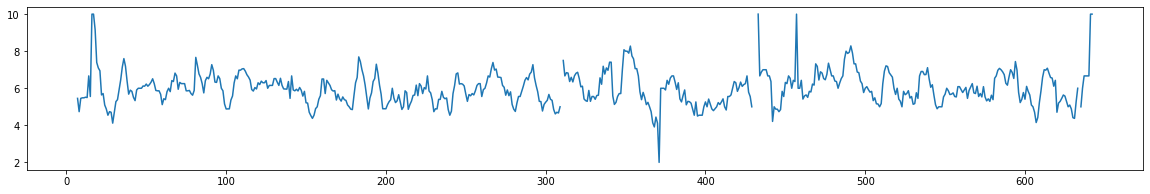

In [61]:
plt.figure(figsize=(20,3))
plt.plot(1/clen_ma_vec)